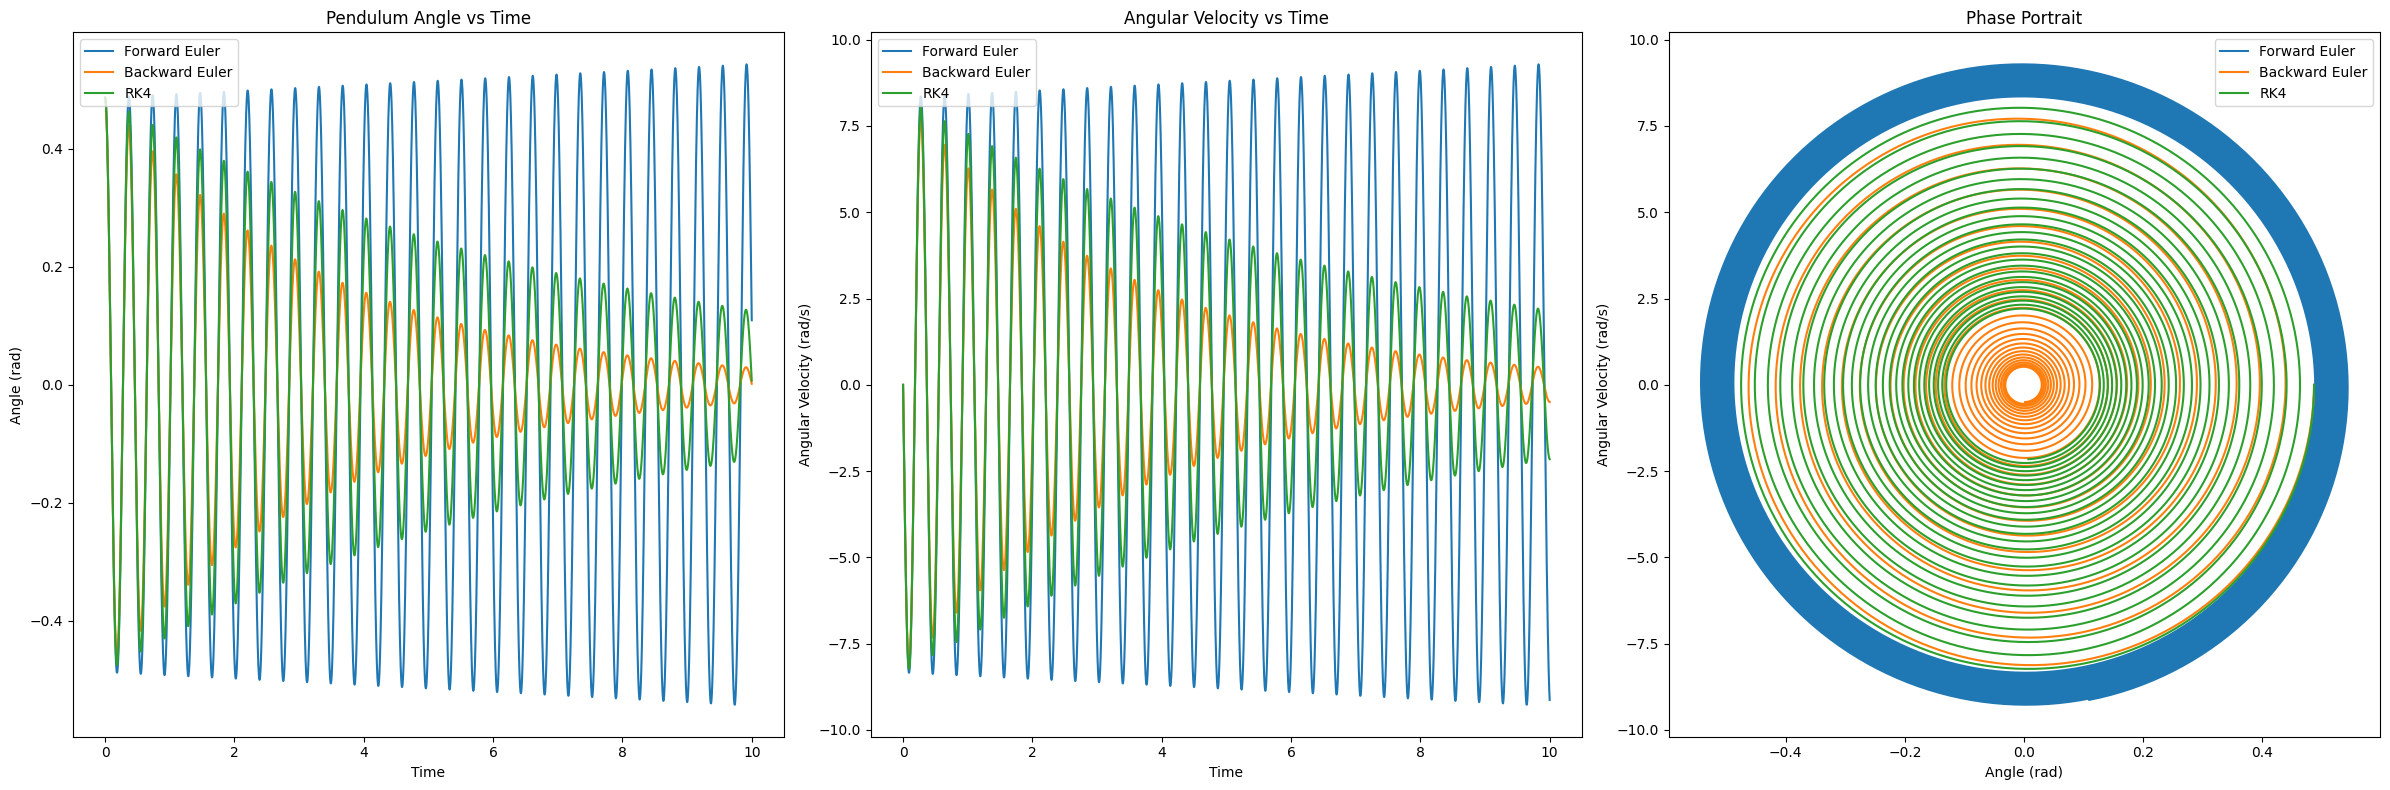

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def pendulum_dynamics(x):
    """
    Pendulum dynamics
    State vector x = [θ, dθ/dt]
    """
    m = 0.4
    k = 20
    b = 0.02
    l = 0.43
    g = 9.81

    theta = x[0]
    theta_dot = x[1]

    theta_ddot = -1 / (m * l * l) * ( b * theta_dot + m * g * l * np.sin(theta) + k * theta)

    return np.array([theta_dot, theta_ddot])

def forward_euler(fun, x0, Tf, h):
    """
    Explicit Euler integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])

    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):
    """
    Implicit Euler integration method using fixed-point iteration
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]  # Initial guess

        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next

            if error < tol:
                break

    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):
    """
    4th order Runge-Kutta integration method
    """
    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)

        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    return x_hist, t

# Test all integrators
x0 = np.array([0.4869619855, 0.0])  # Initial state: [angle, angular_velocity]
Tf = 10.0
h = 0.001

# Forward Euler
x_fe, t_fe = forward_euler(pendulum_dynamics, x0, Tf, h)

# Backward Euler
x_be, t_be = backward_euler(pendulum_dynamics, x0, Tf, h)

# Runge-Kutta 4
x_rk4, t_rk4 = runge_kutta4(pendulum_dynamics, x0, Tf, h)

# Plot results
plt.figure(figsize=(24, 8))

plt.subplot(1, 3, 1)
plt.plot(t_fe, x_fe[0, :], label='Forward Euler')
plt.plot(t_be, x_be[0, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angle (rad)')
plt.legend()
plt.title('Pendulum Angle vs Time')

plt.subplot(1, 3, 2)
plt.plot(t_fe, x_fe[1, :], label='Forward Euler')
plt.plot(t_be, x_be[1, :], label='Backward Euler')
plt.plot(t_rk4, x_rk4[1, :], label='RK4')
plt.xlabel('Time')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Angular Velocity vs Time')

plt.subplot(1, 3, 3)
plt.plot(x_fe[0, :], x_fe[1, :], label='Forward Euler')
plt.plot(x_be[0, :], x_be[1, :], label='Backward Euler')
plt.plot(x_rk4[0, :], x_rk4[1, :], label='RK4')
plt.xlabel('Angle (rad)')
plt.ylabel('Angular Velocity (rad/s)')
plt.legend()
plt.title('Phase Portrait')

plt.tight_layout()
plt.show()